# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np

In [ ]:
data_ = pd.read_csv('/content/drive/MyDrive/Data/creit_card_default_prediction.csv', header = 1)

In [ ]:
data_.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
data_.shape

(30000, 25)

In [ ]:
data=data_.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#check for duplicates
print(len(data[data.duplicated()]))

0


# Analysis on Target Variable

In [ ]:
#renaming for better convinience
data.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)
data.rename(columns={'PAY_0' : 'PAY_1'}, inplace=True)

In [ ]:
data['default_payment_next_month'].value_counts().sort_index()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

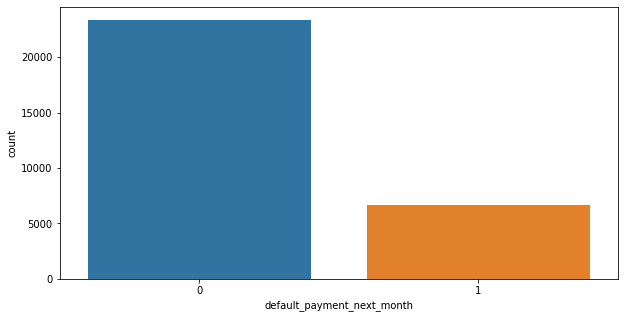

In [ ]:
#check target variable value proportion
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = data)

In [ ]:
data['default_payment_next_month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64

### 22% of customers has default payment next month

# Analysis for Continous Features

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [ ]:
continous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]


## 1. Univariate Analysis of continous features

<Figure size 720x360 with 0 Axes>

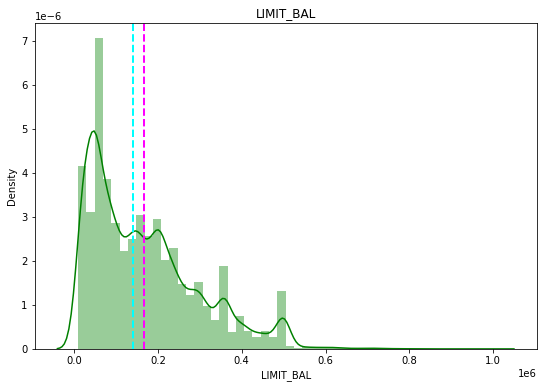

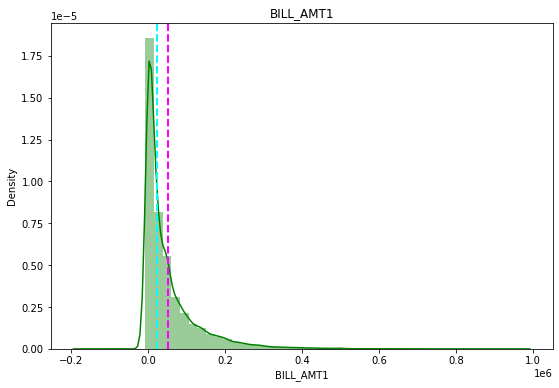

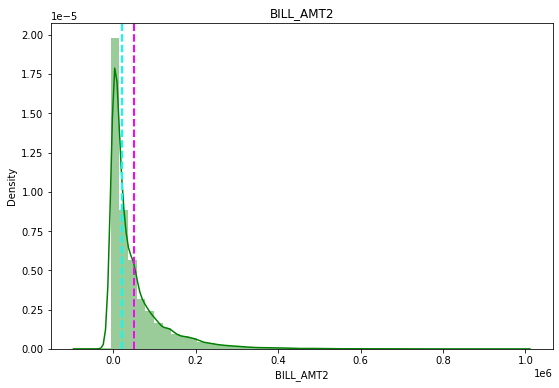

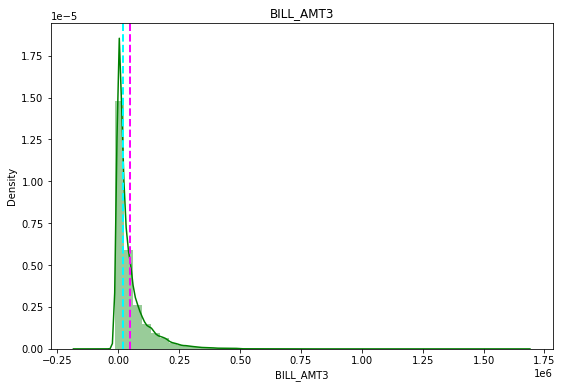

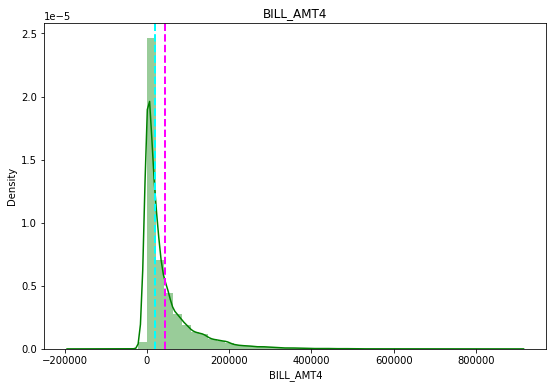

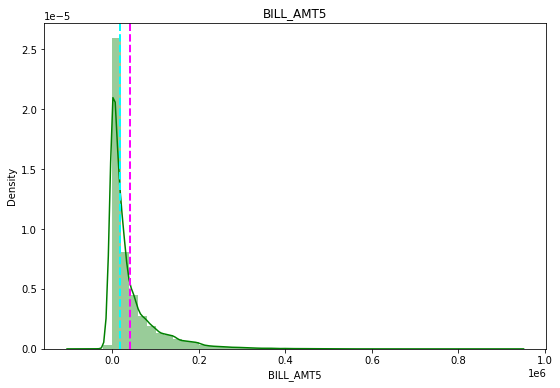

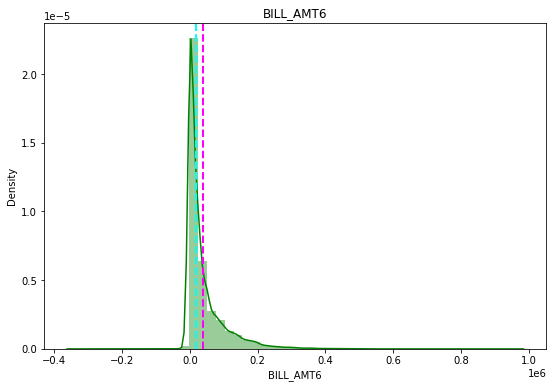

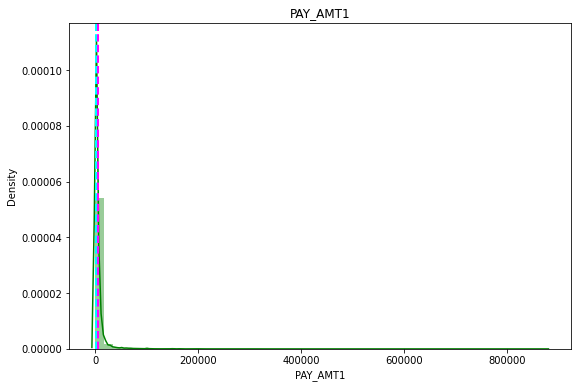

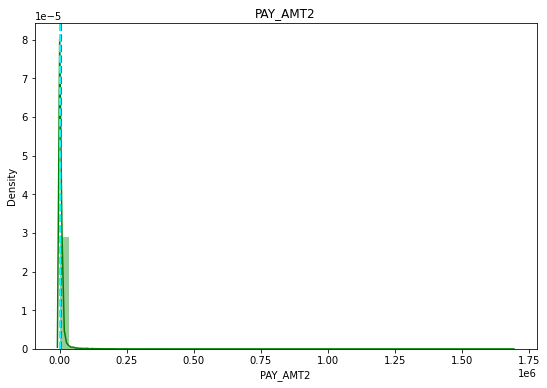

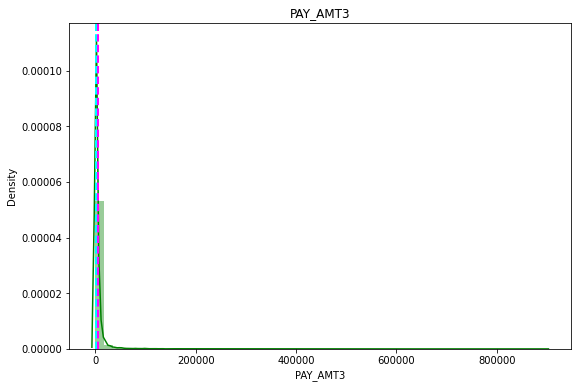

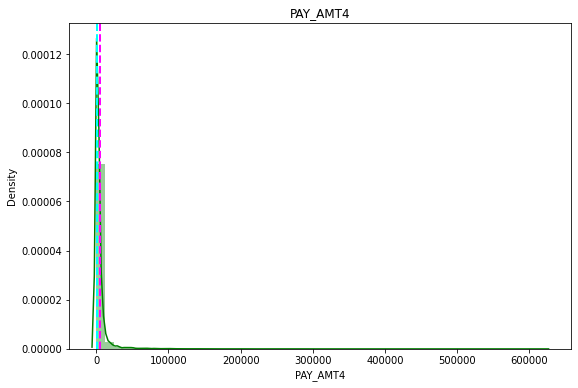

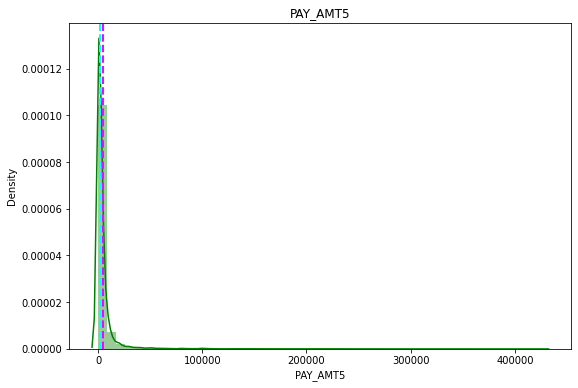

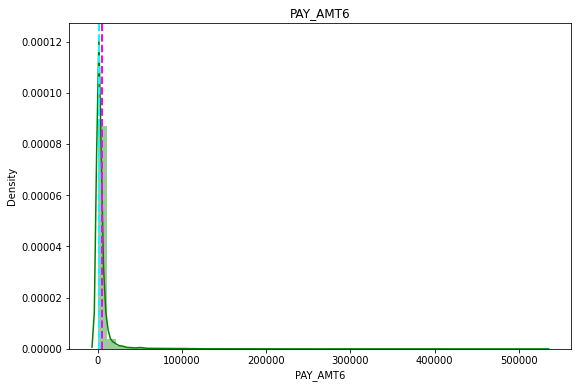

In [ ]:
plt.figure(figsize=(10,5))
for col in continous_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    continous = data[col]
    sns.distplot(data[col], kde=True,ax=ax, color = 'g')
    ax.axvline(continous.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(continous.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()


## 2. Bivariate Analysis of continous features

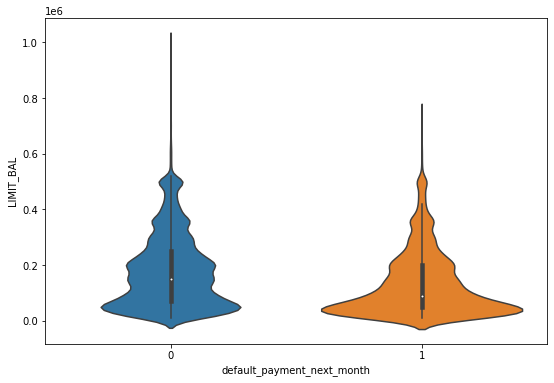

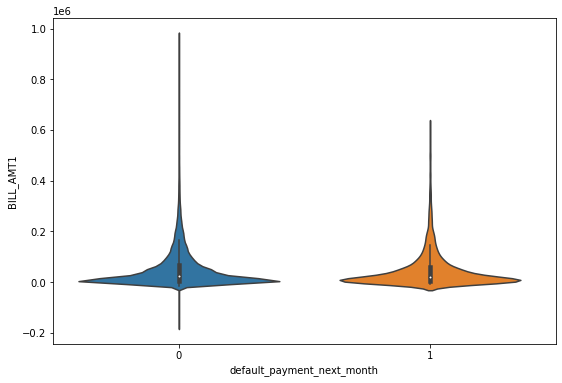

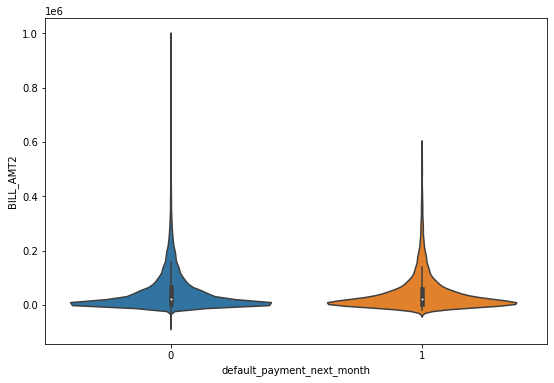

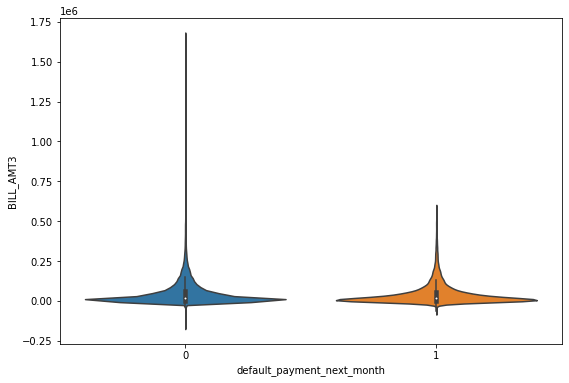

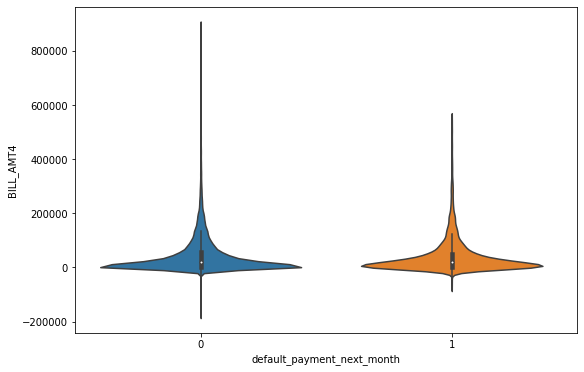

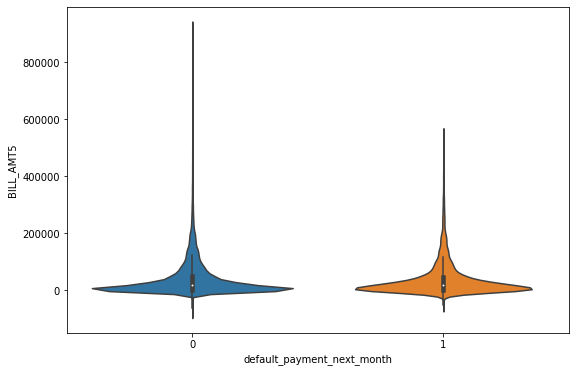

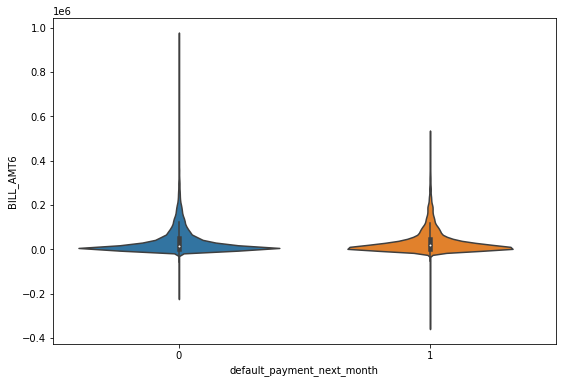

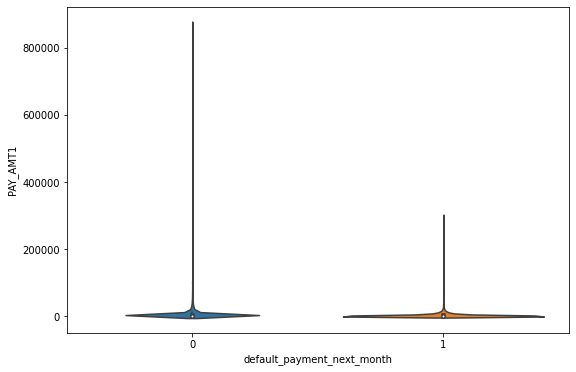

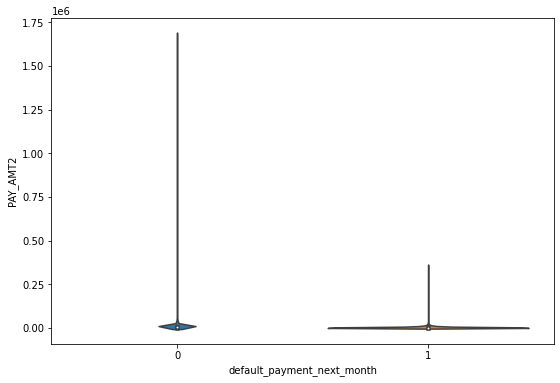

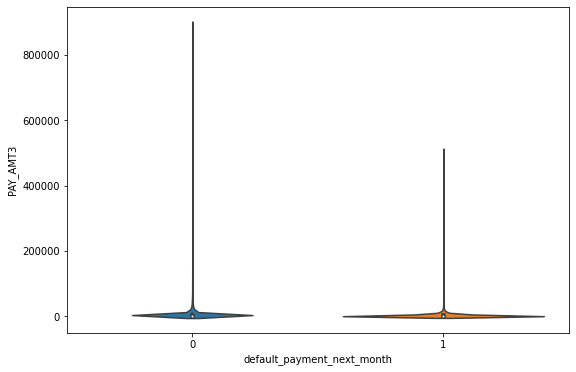

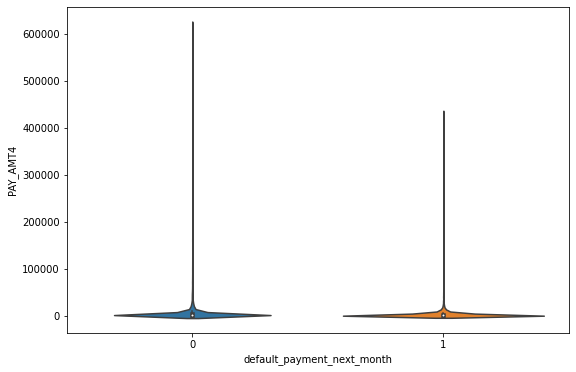

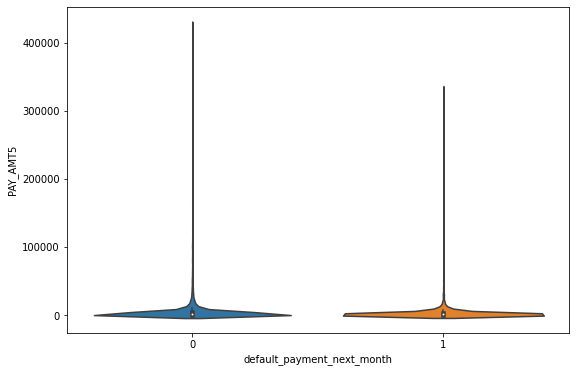

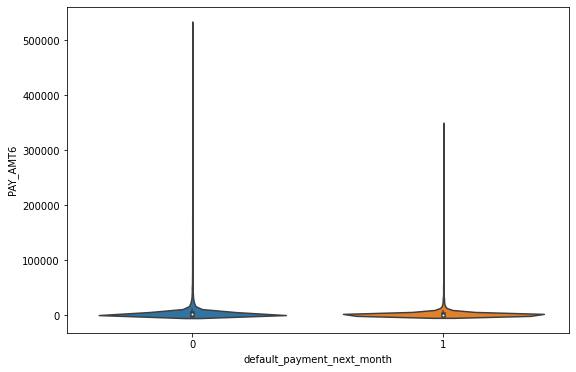

In [ ]:
for col in continous_features:
    fig = plt.figure(figsize=(9, 6))
    continous = data[col]
    label = data['default_payment_next_month']
    sns.violinplot(x=label, y=continous)
    plt.xlabel('default_payment_next_month')
    plt.ylabel(col)
plt.show()

# Analysis of Categorical Variable

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]

## 1. Univariate Analysis of Categorical Features

<Figure size 720x360 with 0 Axes>

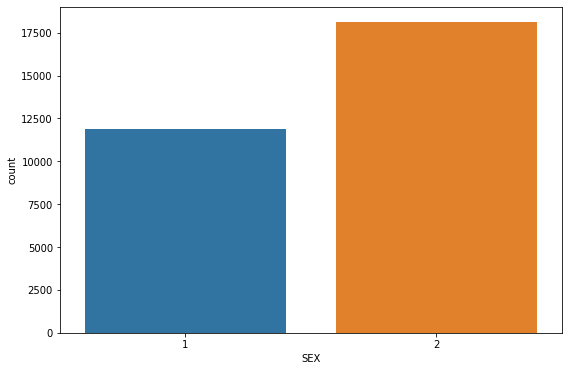

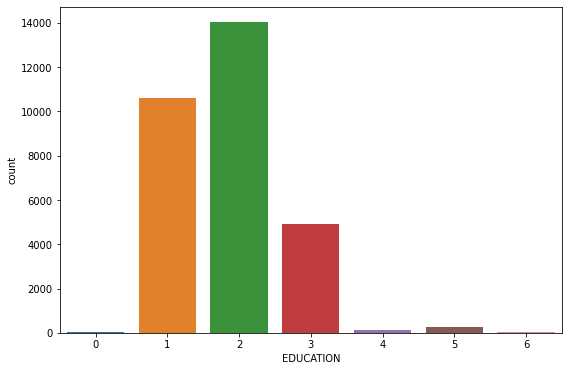

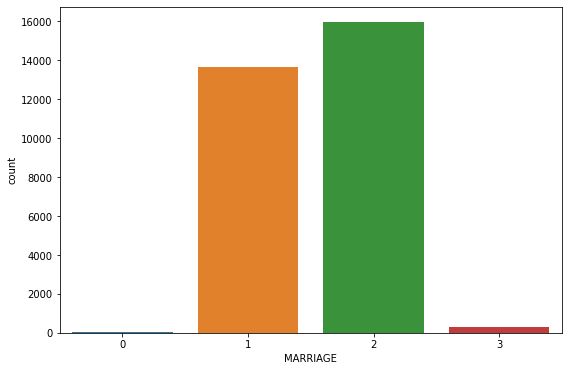

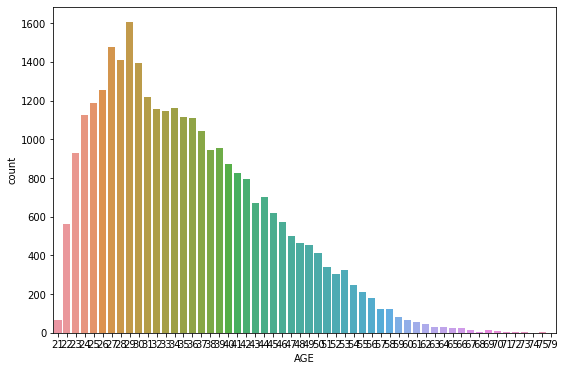

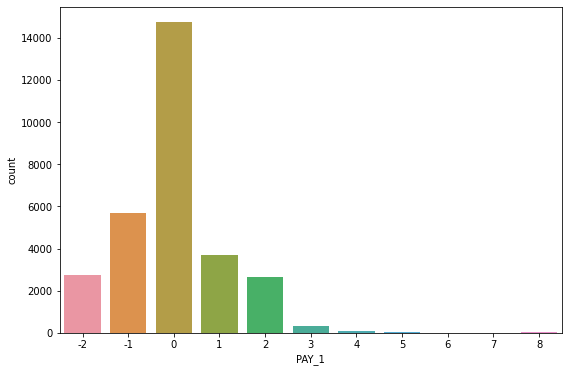

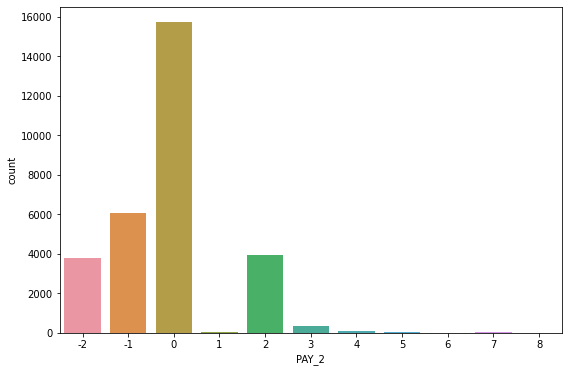

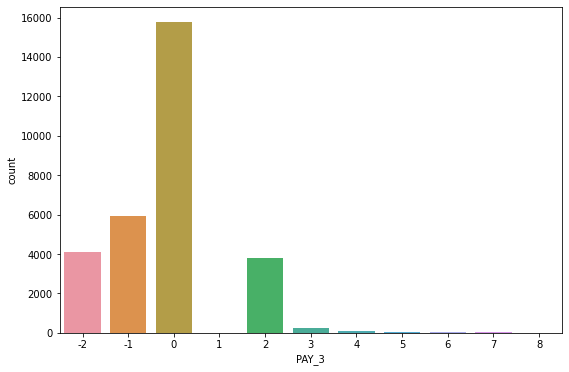

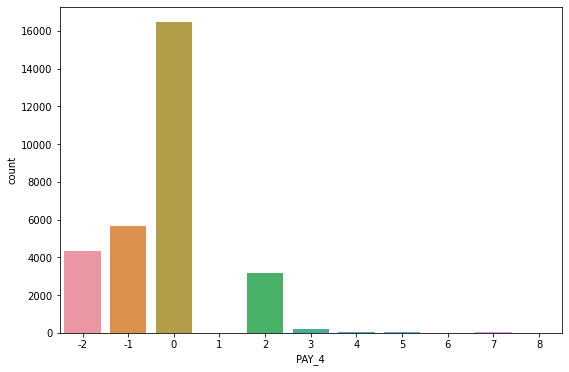

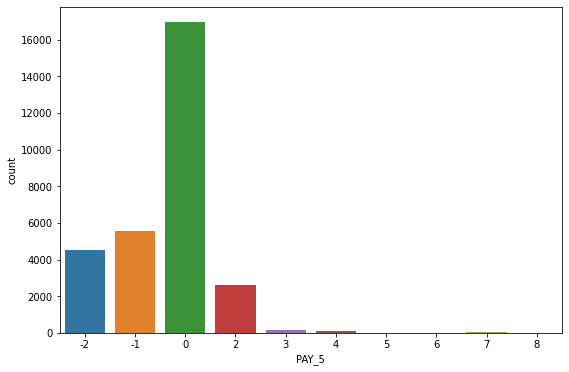

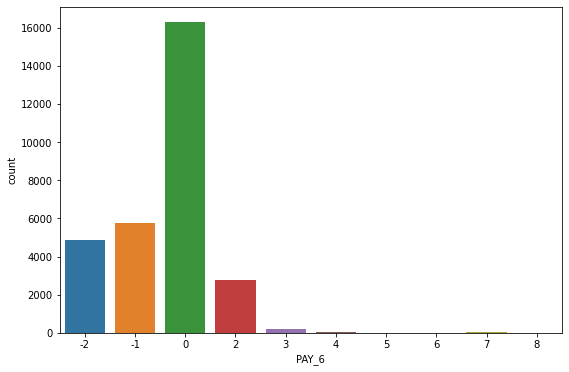

In [ ]:
plt.figure(figsize=(10,5))
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    categorical = data[col]
    sns.countplot(data[col])
plt.show()

## 2. Bivariate Analysis of Categorical Features

<Figure size 720x360 with 0 Axes>

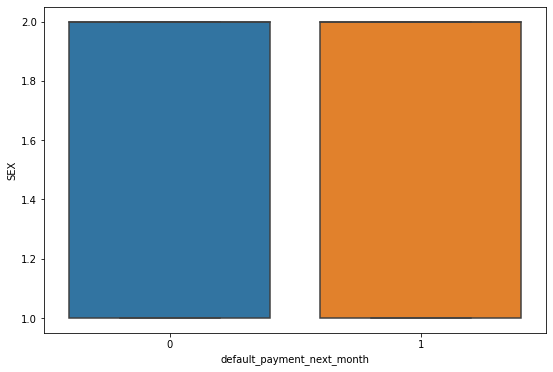

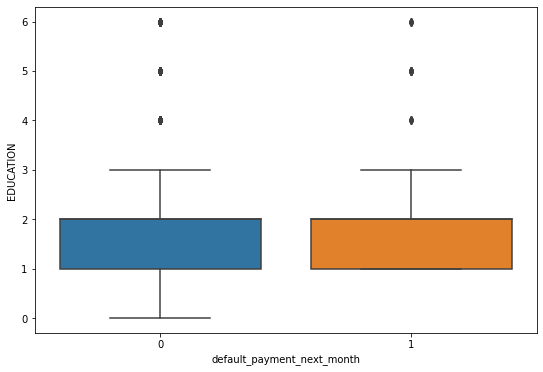

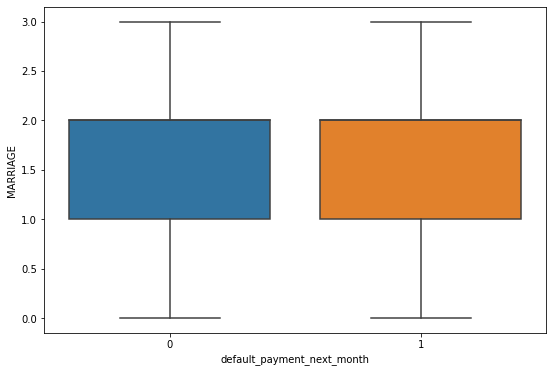

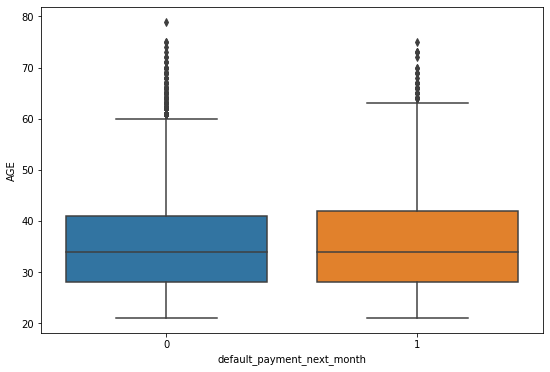

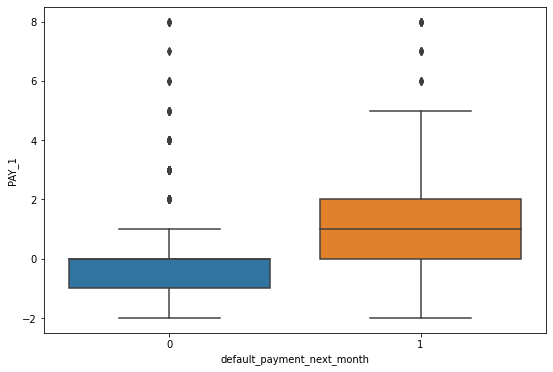

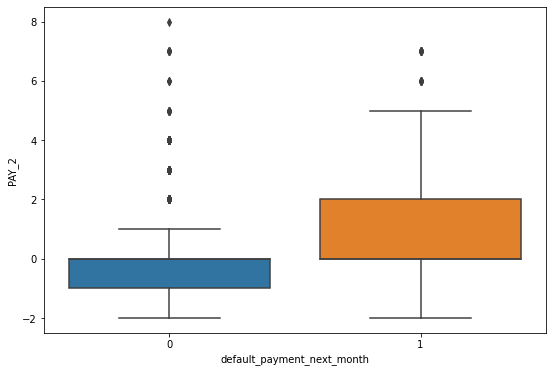

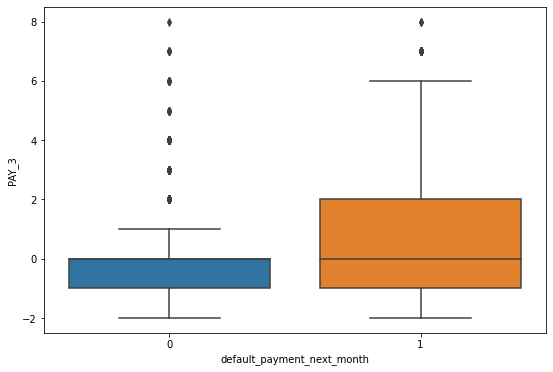

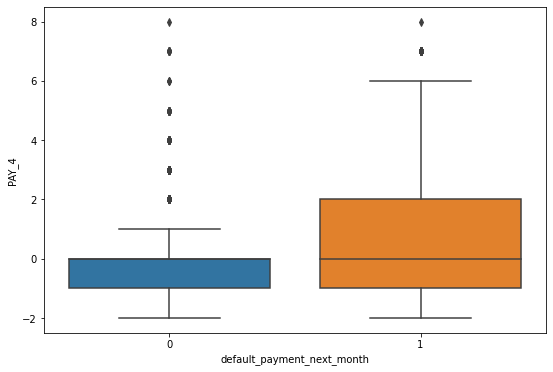

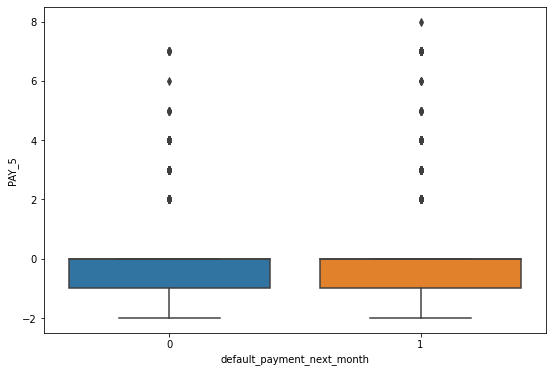

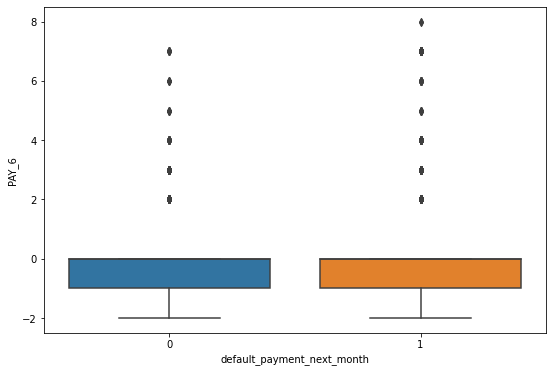

In [ ]:
plt.figure(figsize=(10,5))
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    sns.boxplot(x='default_payment_next_month', y =col, data = data)
plt.show()

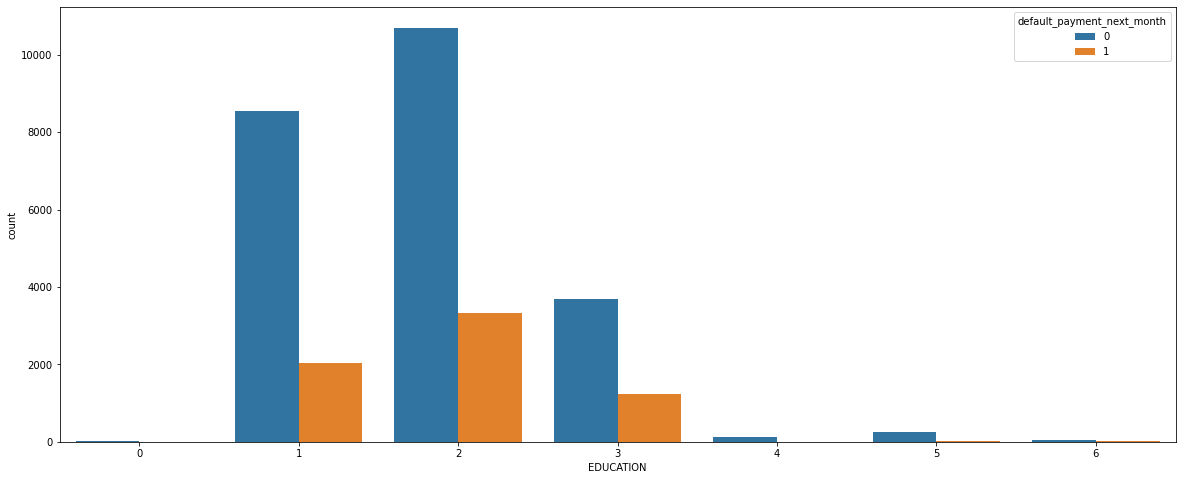

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'EDUCATION',hue = 'default_payment_next_month', data = data)

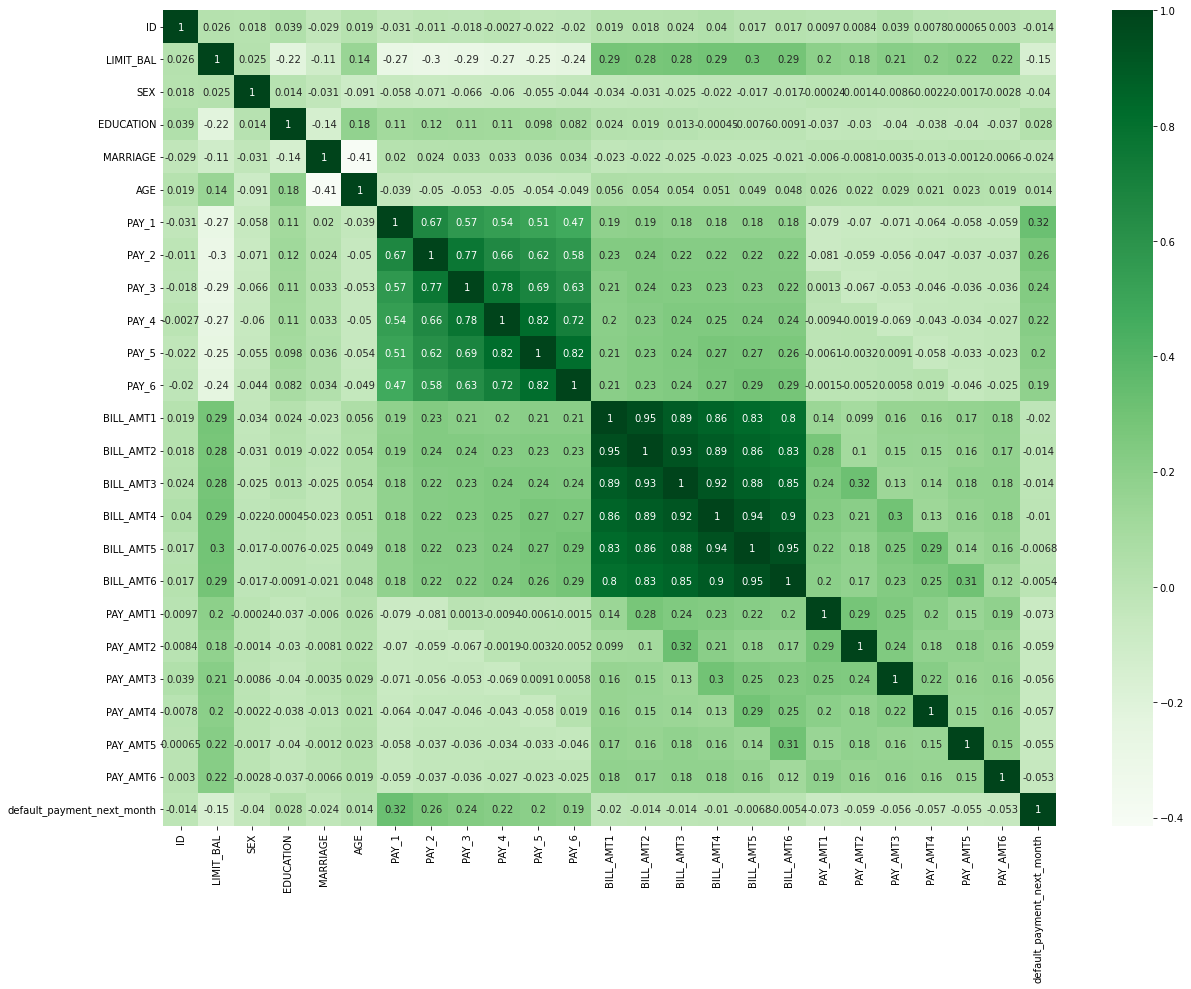

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap="Greens")

Here many features are correlated with each other, but we cant delete those features. Because it contains the past transaction details of the customers.

# Feature Engineering

1. EDUCATION

In [ ]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
data["EDUCATION"] = data["EDUCATION"].replace({5:4,6:4,0:4})
data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

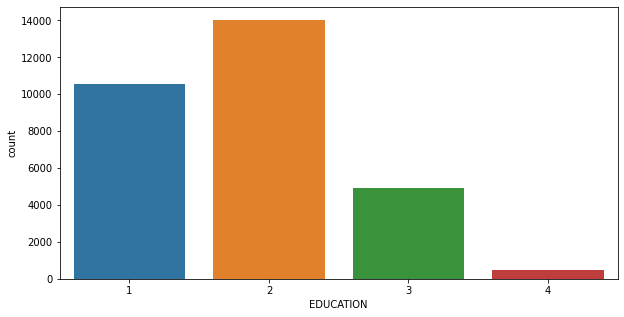

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = data)

2.MARRIAGE

In [ ]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
data["MARRIAGE"] = data["MARRIAGE"].replace({0:3})
data["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

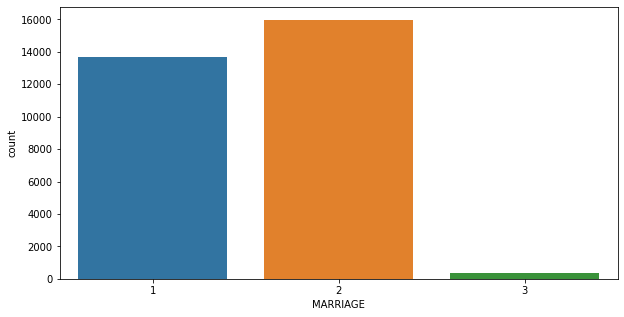

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = data)

3. Age

In [ ]:
# counts the age data set
data['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

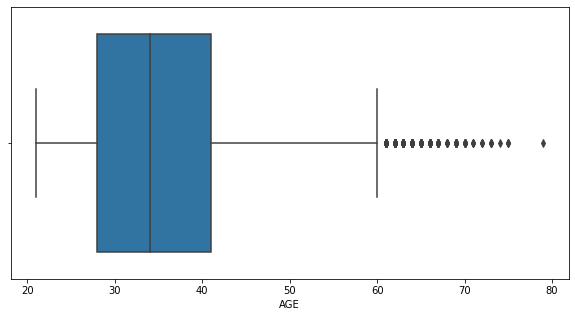

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'AGE', data = data)

In [ ]:
def set_age(x):
  if x>60:
    return 60
  else:
    return x

In [ ]:
data["AGE"] = data["AGE"].apply(lambda x :set_age(x))

In [ ]:
data["AGE"].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
60     339
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
21      67
Name: AGE, dtype: int64

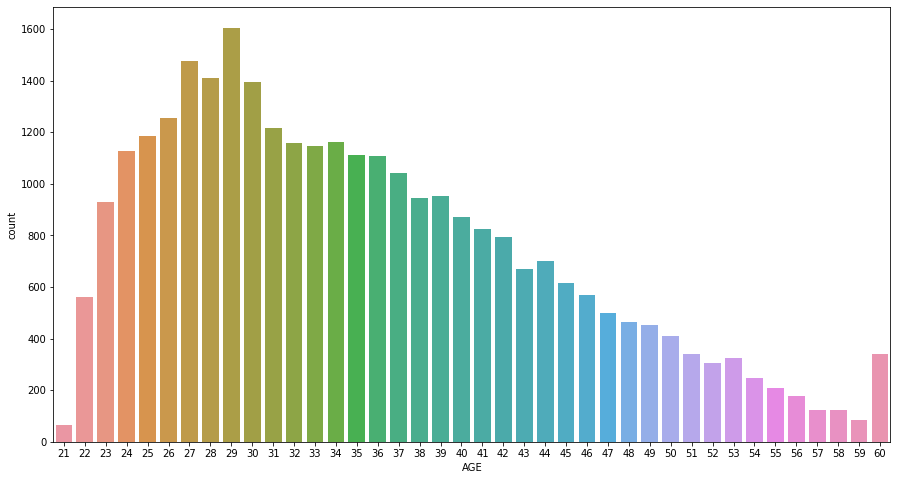

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'AGE', data = data)

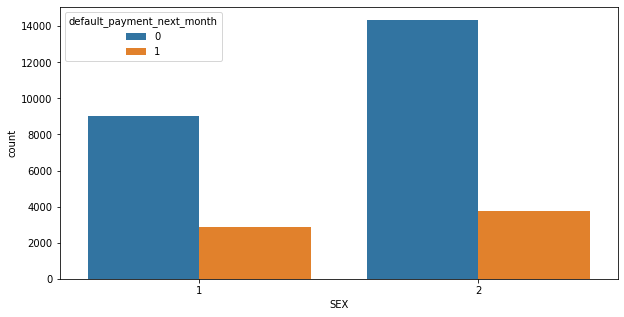

In [ ]:
#target variable VS Sex feature
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', hue = 'default_payment_next_month', data = data)

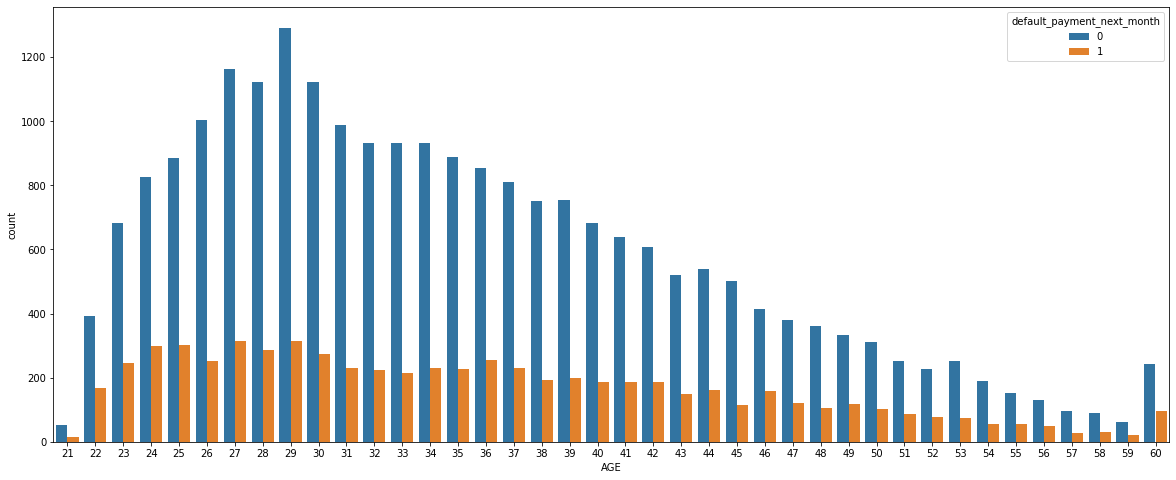

In [ ]:
#target variable VS Age Feature
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE',hue = 'default_payment_next_month', data = data)

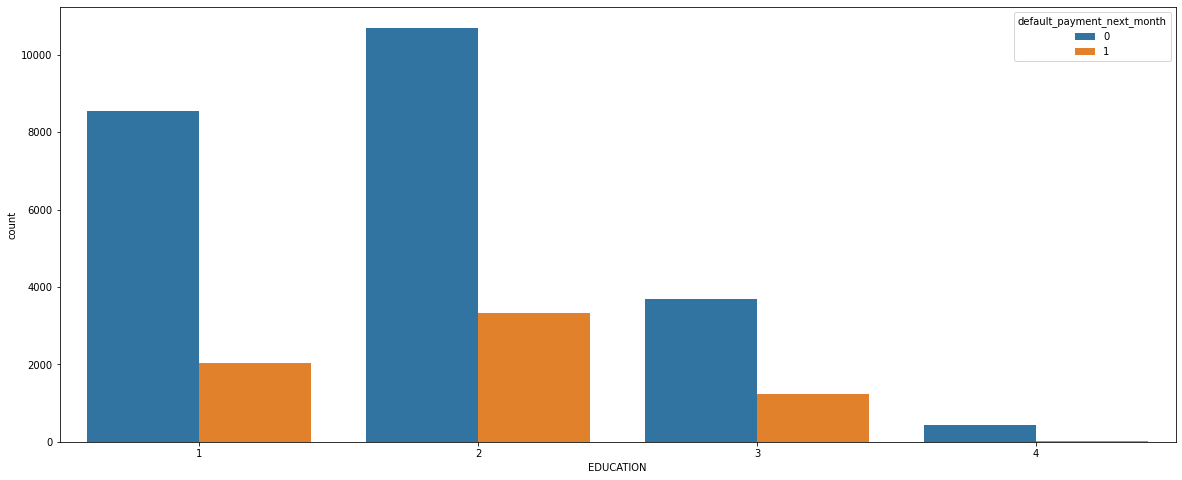

In [ ]:
#target variable VS Education Feature
plt.figure(figsize=(20,8))
sns.countplot(x = 'EDUCATION',hue = 'default_payment_next_month', data = data)

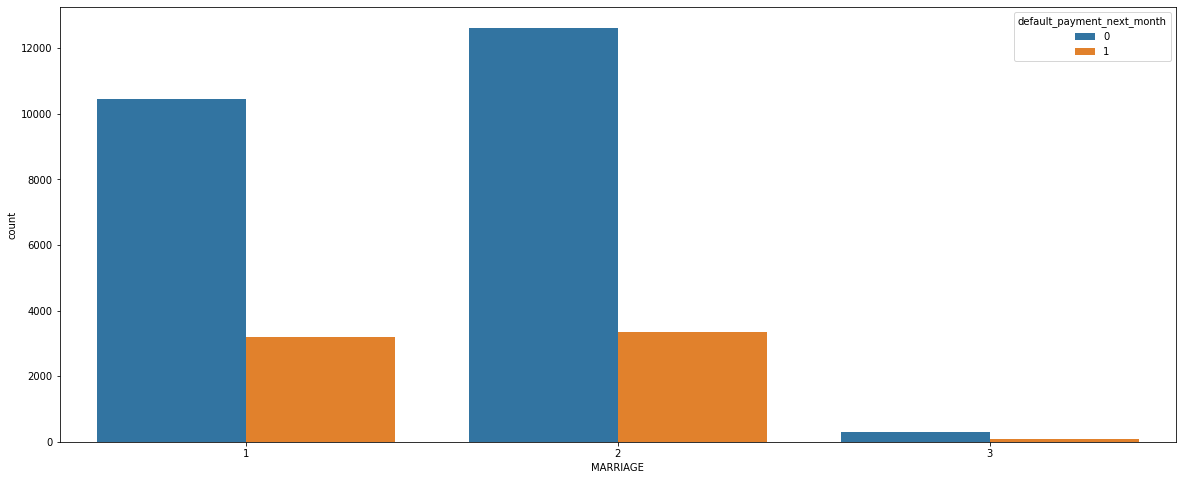

In [ ]:
#target variable VS Marriage Feature
plt.figure(figsize=(20,8))
sns.countplot(x = 'MARRIAGE',hue = 'default_payment_next_month', data = data)

SMOTE

In [ ]:
#using SMOTE for managing target variable and improving imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(data.iloc[:,0:-1], data['default_payment_next_month']) 

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(Y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
print(X_smote)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
46723  24669     210198    1          1         1   44      0      0      0   
46724   4750      30000    1          1         2   28      0      1      1   
46725  10161     200000    2          1         1   38      0     -1     -1   
46726   5719      80000    2          1         1   39      0      0      2   
46727  22065     160000    1          1         1   37      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5 

In [ ]:
df = X_smote
df['default_payment_next_month'] = Y_smote
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(46728, 25)

Text(0, 0.5, 'Frequency')

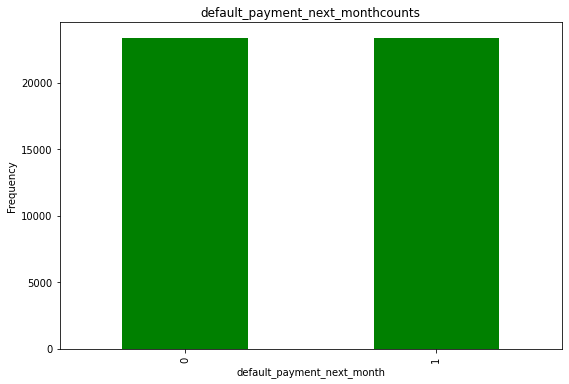

In [ ]:
#check target variable value proportion
counts = df['default_payment_next_month'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='g')
ax.set_title('default_payment_next_month' + 'counts')
ax.set_xlabel('default_payment_next_month') 
ax.set_ylabel("Frequency")

One Hot Encoding

In [ ]:
#get dummies 
df = pd.get_dummies(df, columns=['EDUCATION','MARRIAGE'])
#get dummies
df = pd.get_dummies(df, columns = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6'])

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_-2', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3',
       'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-2',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_1',
       'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_

In [ ]:
#importing packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
#independetn feature
X_ = pd.DataFrame(df.drop('default_payment_next_month', axis=1))

In [ ]:
#dependent feature
Y = df['default_payment_next_month'] 

In [ ]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X_)

In [ ]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.3, random_state=42)

In [ ]:
#create a function to calculate evaluation matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

train_matrix = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score_', 'roc'])
test_matrix = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score_', 'roc'])

def get_score(y_true, y_pred):
  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred)
  recall = recall_score(y_true,y_pred)
  f1_score_ = f1_score(y_true,y_pred)
  roc = roc_auc_score(y_true,y_pred)

  lst = [accuracy, precision, recall, f1_score_, roc]

  return lst

def get_cm(y_true, y_pred):
  # Get the confusion matrix for both train and test
  cm = confusion_matrix(y_true, y_pred)
  print(cm)

  labels = ['Not Defaulter', 'Defaulter']
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
logistic = LogisticRegression()

Using Grid seach cv

In [ ]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }

In [ ]:
#fit the parameter 
grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)
#training model
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500,
                               1000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [ ]:
grid_lr.best_score_

0.6144791237791714

In [ ]:
grid_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
#prediction
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_test = grid_lr.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_lr_train)
train_matrix['Logistic Reggression'] =score
train_matrix

,Logistic Reggression
accuracy,0.613195
precision,0.608560
recall,0.633945
f1_score_,0.620993
roc,0.613201


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_lr_test)
test_matrix['Logistic Reggression'] =score
test_matrix

,Logistic Reggression
accuracy,0.608817
precision,0.603940
recall,0.633733
f1_score_,0.618478
roc,0.608801


[[ 9692  6667]
 [ 5985 10365]]


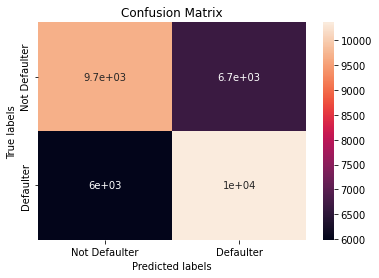

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_lr_train)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# creating param dict to check diffirent value of parameter
max_depth=[13,14,15,16,17,18,19,20]
min_samples_leaf=[10,11,12,13,14,15]
splitter = ['random']
params = {'splitter':splitter, 'max_depth' :max_depth, 'min_samples_leaf': min_samples_leaf}

In [ ]:
#fit the parameter
dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=params,verbose=0)
#training model
dt_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [10, 11, 12, 13, 14, 15],
                         'splitter': ['random']})

In [ ]:
dt_clf.best_params_

{'max_depth': 19, 'min_samples_leaf': 10, 'splitter': 'random'}

In [ ]:
#prediction
y_pred_dt_train = dt_clf.predict(X_train)
y_pred_dt_test = dt_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_dt_train)
train_matrix['Decision Tree'] =score
train_matrix

,Logistic Reggression,Decision Tree
accuracy,0.613195,0.796019
precision,0.608560,0.847629
recall,0.633945,0.721651
f1_score_,0.620993,0.779584
roc,0.613201,0.795999


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_dt_test)
test_matrix['Decision Tree'] =score
test_matrix

,Logistic Reggression,Decision Tree
accuracy,0.608817,0.748270
precision,0.603940,0.791925
recall,0.633733,0.673938
f1_score_,0.618478,0.728183
roc,0.608801,0.748318


[[14238  2121]
 [ 4551 11799]]


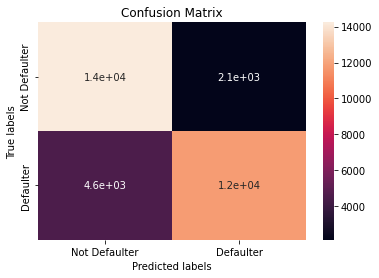

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_dt_train)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors' : [2,3,4,5]}

In [ ]:
#fit the parameter
knn = GridSearchCV(KNeighborsClassifier() , param_grid, n_jobs = -1, verbose = 3, cv = 3)
#training model
knn.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5]}, verbose=3)

In [ ]:
knn.best_params_

{'n_neighbors': 2}

In [ ]:
#prediction
y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_knn_train)
train_matrix['KNN'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN
accuracy,0.613195,0.796019,0.965514
precision,0.608560,0.847629,1.000000
recall,0.633945,0.721651,0.931009
f1_score_,0.620993,0.779584,0.964272
roc,0.613201,0.795999,0.965505


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_knn_test)
test_matrix['KNN'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN
accuracy,0.608817,0.748270,0.784863
precision,0.603940,0.791925,0.780522
recall,0.633733,0.673938,0.792985
f1_score_,0.618478,0.728183,0.786704
roc,0.608801,0.748318,0.784858


[[16359     0]
 [ 1128 15222]]


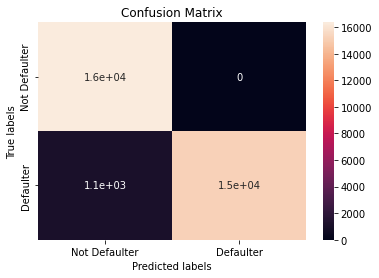

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_knn_train)

# Random Forest

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 25, min_samples_leaf=12)

In [ ]:
#training model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=12)

In [ ]:
#prediction
y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_test = rf_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_rf_train)
train_matrix['Random forest'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest
accuracy,0.613195,0.796019,0.965514,0.844997
precision,0.608560,0.847629,1.000000,0.878270
recall,0.633945,0.721651,0.931009,0.800917
f1_score_,0.620993,0.779584,0.964272,0.837812
roc,0.613201,0.795999,0.965505,0.844985


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_rf_test)
test_matrix['Random forest'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest
accuracy,0.608817,0.748270,0.784863,0.794279
precision,0.603940,0.791925,0.780522,0.825607
recall,0.633733,0.673938,0.792985,0.746507
f1_score_,0.618478,0.728183,0.786704,0.784067
roc,0.608801,0.748318,0.784858,0.794310


[[14544  1815]
 [ 3255 13095]]


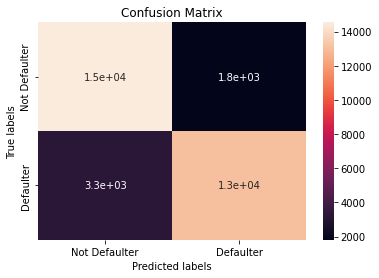

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_rf_train)

# SVC

In [ ]:
#import the packages
from sklearn.svm import SVC
# defining parameter range 
param_grid = {'C': [100],'kernel': ['rbf']}

In [ ]:
#set the parmeter
#fit the parameter
svc_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)

svc_clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [100], 'kernel': ['rbf']}, scoring='accuracy',
             verbose=3)

In [ ]:
optimal_SVC_clf = svc_clf.best_estimator_

In [ ]:
# Get the predicted classes
y_pred_svc_train = optimal_SVC_clf.predict(X_train)
y_pred_svc_test = optimal_SVC_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_svc_train)
train_matrix['SVC'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,SVC
accuracy,0.613195,0.796019,0.965514,0.844997,0.668593
precision,0.608560,0.847629,1.000000,0.878270,0.629173
recall,0.633945,0.721651,0.931009,0.800917,0.820734
f1_score_,0.620993,0.779584,0.964272,0.837812,0.712299
roc,0.613201,0.795999,0.965505,0.844985,0.668635


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_svc_test)
test_matrix['SVC'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,SVC
accuracy,0.608817,0.748270,0.784863,0.794279,0.645481
precision,0.603940,0.791925,0.780522,0.825607,0.610630
recall,0.633733,0.673938,0.792985,0.746507,0.804249
f1_score_,0.618478,0.728183,0.786704,0.784067,0.694191
roc,0.608801,0.748318,0.784858,0.794310,0.645379


[[ 8450  7909]
 [ 2931 13419]]


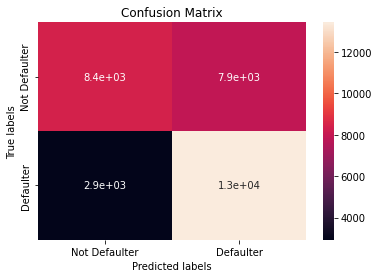

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_svc_train)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#setting parameters for gboost
parameters={'max_depth':[12],'min_samples_leaf':[12],'learning_rate':[.05]}

In [ ]:
#set the parmeter
#fit the parameter
gb_clf = GridSearchCV(GradientBoostingClassifier(), param_grid = parameters, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
gb_clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [12],
                         'min_samples_leaf': [12]},
             scoring='accuracy', verbose=3)

In [ ]:
gb_clf.best_params_


{'learning_rate': 0.05, 'max_depth': 12, 'min_samples_leaf': 12}

In [ ]:
# Get the predicted classes
y_pred_gb_train = gb_clf.predict(X_train)
y_pred_gb_test = gb_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_gb_train)
train_matrix['GB'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,SVC,GB
accuracy,0.613195,0.796019,0.965514,0.844997,0.668593,0.925311
precision,0.608560,0.847629,1.000000,0.878270,0.629173,0.951028
recall,0.633945,0.721651,0.931009,0.800917,0.820734,0.896758
f1_score_,0.620993,0.779584,0.964272,0.837812,0.712299,0.923096
roc,0.613201,0.795999,0.965505,0.844985,0.668635,0.925303


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_gb_test)
test_matrix['GB'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,SVC,GB
accuracy,0.608817,0.748270,0.784863,0.794279,0.645481,0.826878
precision,0.603940,0.791925,0.780522,0.825607,0.610630,0.858080
recall,0.633733,0.673938,0.792985,0.746507,0.804249,0.783576
f1_score_,0.618478,0.728183,0.786704,0.784067,0.694191,0.819137
roc,0.608801,0.748318,0.784858,0.794310,0.645379,0.826906


[[15604   755]
 [ 1688 14662]]


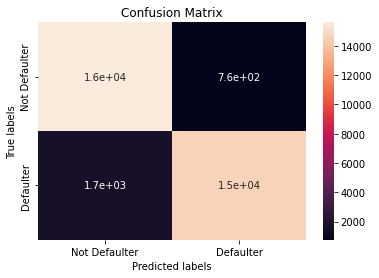

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_gb_train)

# Model validation

In [ ]:
#all models evaluation matrices
final_matrices=test_matrix.transpose().reset_index().rename(columns={'index':'Models'})

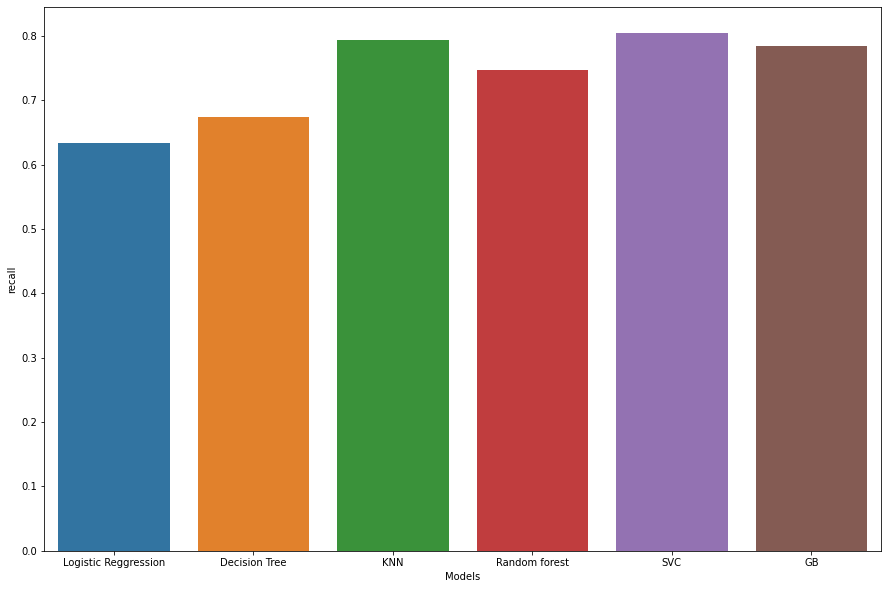

In [ ]:
#plot recall scores for all model
plt.figure(figsize=(15,10))
sns.barplot(x='Models',y='recall',data=final_matrices)

# LIME

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LIME SECTION
import lime
import lime.lime_tabular


In [ ]:
# LIME SECTION
import lime
import lime.lime_tabular


In [ ]:
# LIME has one explainer for all the models
lime_svc = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  verbose=True, mode='classification')


In [ ]:
# Choose the 5th instance and use it to predict the results
p = 5
exp_svc = lime_svc.explain_instance(X_test.values[p], svc_clf.predict_proba, num_features=6)
exp_svc.show_in_notebook(show_all=False)

Intercept 0.1691719250531353
Prediction_local [0.31399492]
Right: 0.6643264618191161


# Feature importance

In [ ]:

features = X_train.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances[:10])

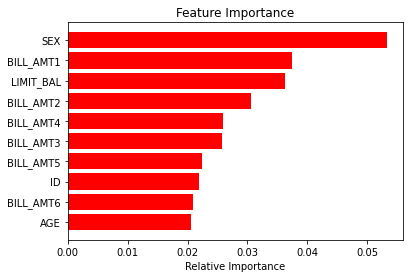

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# ELI5

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(doc, pipe.predict_proba)
te.show_prediction(target_names=twenty_train.target_names)

In [ ]:
#import eli5
import eli5 as eli
feature_names=list(X_test.columns)

In [ ]:
for_instance=2

In [ ]:
 eli.show_prediction(gb_clf.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

## From above charts we can say that lmit baance and the last months transactions are the important features for prediction the defaulter